In [7]:
import os
import warnings
warnings.filterwarnings("ignore")

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ultralytics import YOLO

In [23]:
model = YOLO('best.pt')

folder_path = "test_images_ready"  

In [24]:
df = pd.DataFrame(columns=["filename", "weapon", "classes"])

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    results = model(file_path, save_txt=True, save_crop=True)
    img = cv2.imread(file_path)

    weapon_list = []
    classes_list = []

    for result in results:
        boxes = result.boxes.cpu().numpy()

        for box in boxes:
            r = box.xyxy[0].astype(int)
            cls = box.cls[0].astype(int)


            if cls == 1:
                label = "Short weapons"
            elif cls == 2:
                label = "Long weapons"

            classes_list.append(label)

    weapon = bool(len(classes_list) >=1)
    df = df.append({"filename": filename, "weapon": weapon, "classes": classes_list}, ignore_index=True)

df.to_csv("submission.csv", sep=";", index=False)
df.head(100)


image 1/1 /home/isibgatullina/pfo/test_images_ready/3.jpg: 1024x1024 1 man_with_weapon, 493.6ms
Speed: 5.1ms preprocess, 493.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict14
1 label saved to runs/detect/predict14/labels

image 1/1 /home/isibgatullina/pfo/test_images_ready/34.jpg: 576x1024 (no detections), 274.5ms
Speed: 2.6ms preprocess, 274.5ms inference, 0.4ms postprocess per image at shape (1, 3, 576, 1024)
Results saved to runs/detect/predict14
1 label saved to runs/detect/predict14/labels

image 1/1 /home/isibgatullina/pfo/test_images_ready/25.jpg: 768x1024 (no detections), 349.2ms
Speed: 3.2ms preprocess, 349.2ms inference, 0.5ms postprocess per image at shape (1, 3, 768, 1024)
Results saved to runs/detect/predict14
1 label saved to runs/detect/predict14/labels

image 1/1 /home/isibgatullina/pfo/test_images_ready/6.jpg: 800x1024 (no detections), 346.8ms
Speed: 3.4ms preprocess, 346.8ms inference, 0.5ms postprocess per 


image 1/1 /home/isibgatullina/pfo/test_images_ready/38.jpg: 608x1024 (no detections), 355.5ms
Speed: 2.8ms preprocess, 355.5ms inference, 0.4ms postprocess per image at shape (1, 3, 608, 1024)
Results saved to runs/detect/predict14
16 labels saved to runs/detect/predict14/labels

image 1/1 /home/isibgatullina/pfo/test_images_ready/44.jpg: 608x1024 1 man_with_weapon, 356.0ms
Speed: 2.6ms preprocess, 356.0ms inference, 0.7ms postprocess per image at shape (1, 3, 608, 1024)
Results saved to runs/detect/predict14
17 labels saved to runs/detect/predict14/labels

image 1/1 /home/isibgatullina/pfo/test_images_ready/28.jpg: 576x1024 1 man_with_weapon, 339.1ms
Speed: 2.6ms preprocess, 339.1ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)
Results saved to runs/detect/predict14
18 labels saved to runs/detect/predict14/labels

image 1/1 /home/isibgatullina/pfo/test_images_ready/4.jpg: 832x1024 (no detections), 538.0ms
Speed: 3.5ms preprocess, 538.0ms inference, 0.5ms postproce

image 1/1 /home/isibgatullina/pfo/test_images_ready/22.jpg: 768x1024 1 man_with_weapon, 469.6ms
Speed: 3.5ms preprocess, 469.6ms inference, 0.7ms postprocess per image at shape (1, 3, 768, 1024)
Results saved to runs/detect/predict14
37 labels saved to runs/detect/predict14/labels

image 1/1 /home/isibgatullina/pfo/test_images_ready/15.jpg: 704x1024 1 man_with_weapon, 410.4ms
Speed: 2.3ms preprocess, 410.4ms inference, 0.8ms postprocess per image at shape (1, 3, 704, 1024)
Results saved to runs/detect/predict14
38 labels saved to runs/detect/predict14/labels

image 1/1 /home/isibgatullina/pfo/test_images_ready/29.jpg: 640x1024 1 short_weapons, 372.2ms
Speed: 2.7ms preprocess, 372.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 1024)
Results saved to runs/detect/predict14
39 labels saved to runs/detect/predict14/labels

image 1/1 /home/isibgatullina/pfo/test_images_ready/1.jpg: 896x1024 1 man_with_weapon, 561.0ms
Speed: 3.4ms preprocess, 561.0ms inference, 0.8ms postproc

filename weapon                                        classes
0     3.jpg   True                                 [Long weapons]
1    34.jpg  False                                             []
2    25.jpg  False                                             []
3     6.jpg  False                                             []
4    60.jpg  False                                             []
5    26.jpg  False                                             []
6    21.jpg   True                                 [Long weapons]
7    49.jpg  False                                             []
8    52.jpg   True     [Long weapons, Long weapons, Long weapons]
9    42.jpg   True  [Short weapons, Short weapons, Short weapons]
10   43.jpg   True                                [Short weapons]
11   47.jpg   True                                [Short weapons]
12   40.jpg   True                 [Short weapons, Short weapons]
13   18.jpg   True                 [Short weapons, Short weapons]
14   13.jpg  False                                             []
15   31.jpg   True                  [Short weapons, Long weapons]
16   24.jpg   True                                 [Long weapons]
17    5.jpg   True     [Long weapons, Long weapons, Long weapons]
18   37.jpg   True                                 [Long weapons]
19    9.jpg  False                                             []
20   36.jpg  False                                             []
21   32.jpg  False                                             []
22   30.jpg   True                  [Long weapons, Short weapons]
23   54.jpg   True                 [Short weapons, Short weapons]
24   10.jpg  False                                             []
25   39.jpg   True                                [Short weapons]
26   35.jpg  False                                             []
27   27.jpg   True                 [Short weapons, Short weapons]
28   38.jpg  False                                             []
29   44.jpg   True                                [Short weapons]
30   28.jpg   True                                [Short weapons]
31    4.jpg  False                                             []
32   20.jpg  False                                             []
33   23.jpg   True                                 [Long weapons]
34   45.jpg   True                   [Long weapons, Long weapons]
35   14.jpg   True                   [Long weapons, Long weapons]
36   12.jpg   True                   [Long weapons, Long weapons]
37    7.jpg   True                                 [Long weapons]
38   17.jpg   True                                 [Long weapons]
39   55.jpg   True                                [Short weapons]
40   53.jpg   True                                [Short weapons]
41   11.jpg   True                 [Short weapons, Short weapons]
42   16.jpg  False                                             []
43   48.jpg   True                 [Short weapons, Short weapons]
44   46.jpg   True                                [Short weapons]
45   58.jpg   True                                [Short weapons]
46    8.jpg   True                                [Short weapons]
47   19.jpg   True                 [Short weapons, Short weapons]
48   51.jpg   True                  [Short weapons, Long weapons]
49   56.jpg  False                                             []
50   59.jpg   True                                 [Long weapons]
51    2.jpg   True     [Long weapons, Long weapons, Long weapons]
52   50.jpg   True                                 [Long weapons]
53   57.jpg  False                                             []
54   33.jpg  False                                             []
55   41.jpg  False                                             []
56   22.jpg   True                                 [Long weapons]
57   15.jpg   True                                 [Long weapons]
58   29.jpg   True                                [Short weapons]
59    1.jpg   True                         

In [8]:
df = pd.DataFrame(columns=["Filename", "Bbox", "Class Label"])

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    results = model(file_path, save_txt=True)
    img = cv2.imread(file_path)

    for result in results:
        boxes = result.boxes.cpu().numpy()
        
        for box in boxes:
            r = box.xyxy[0].astype(int)
            cls = box.cls[0].astype(int)

            if cls == 0:
                label = "Man with weapon"
            elif cls == 1:
                label = "Short weapons"
            elif cls == 2:
                label = "Long weapons"

            df = df.append({"Filename": filename, "Bbox": r.tolist(), "Class Label": label}, ignore_index=True)
print(df.shape)       
df.head(50)


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/3.jpg: 576x1024 1 man_with_weapon, 1 short_weapons, 250.7ms
Speed: 2.4ms preprocess, 250.7ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)
Results saved to runs/detect/predict13
18 labels saved to runs/detect/predict13/labels

image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/6.jpg: 1024x1024 (no detections), 476.9ms
Speed: 3.9ms preprocess, 476.9ms inference, 0.5ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict13
18 labels saved to runs/detect/predict13/labels

image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/18.jpg: 1024x448 1 man_with_weapon, 164.4ms
Speed: 2.0ms preprocess, 164.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 448)
Results saved to runs/detect/predict13
18 labels saved to runs/detect/predict13/labels

image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/13.jpg: 544x1024 2 man_with_weapons, 2 short_weaponss, 264.2ms


(37, 3)


Filename                      Bbox      Class Label
0     3.jpg       [303, 71, 548, 422]  Man with weapon
1     3.jpg      [398, 124, 536, 246]    Short weapons
2    18.jpg         [8, 24, 220, 524]  Man with weapon
3    13.jpg     [506, 104, 1112, 576]  Man with weapon
4    13.jpg      [572, 350, 783, 551]    Short weapons
5    13.jpg         [1, 42, 436, 617]  Man with weapon
6    13.jpg      [153, 313, 247, 460]    Short weapons
7     5.jpg          [4, 8, 550, 392]  Man with weapon
8     9.jpg        [75, 13, 787, 889]  Man with weapon
9     9.jpg       [612, 98, 778, 238]    Short weapons
10    4.jpg        [452, 0, 980, 690]  Man with weapon
11    4.jpg       [252, 0, 1012, 716]  Man with weapon
12   20.jpg       [79, 113, 495, 241]     Long weapons
13   20.jpg       [227, 35, 699, 519]  Man with weapon
14   20.jpg        [71, 32, 658, 509]  Man with weapon
15   14.jpg     [430, 160, 1025, 840]  Man with weapon
16   12.jpg        [88, 75, 383, 392]  Man with weapon
17   12.jpg       [178, 78, 381, 388]  Man with weapon
18   12.jpg      [392, 160, 717, 671]  Man with weapon
19    7.jpg      [805, 74, 1318, 990]  Man with weapon
20   17.jpg        [65, 45, 478, 558]  Man with weapon
21   11.jpg     [955, 443, 1082, 605]  Man with weapon
22   16.jpg   [1202, 892, 1426, 1093]    Short weapons
23   16.jpg   [1130, 396, 1995, 1280]  Man with weapon
24   16.jpg  [1798, 1032, 1954, 1264]    Short weapons
25    8.jpg        [34, 49, 877, 975]  Man with weapon
26   19.jpg        [13, 44, 214, 554]  Man with weapon
27   19.jpg        [12, 14, 206, 423]  Man with weapon
28   19.jpg       [20, 137, 217, 372]     Long weapons
29    2.jpg     [920, 448, 1259, 730]    Short weapons
30    2.jpg      [824, 2, 1915, 1077]  Man with weapon
31    2.jpg     [891, 349, 1367, 742]    Short weapons
32   15.jpg     [302, 167, 1190, 463]     Long weapons
33   15.jpg      [198, 77, 1014, 776]  Man with weapon
34   15.jpg     [293, 129, 1199, 563]     Long weapons
35    1.jpg       [206, 29, 882, 929]  Man with weapon
36    1.jpg       [482, 99, 928, 899]     Long weapons

In [ ]:
df.to_csv("submission.csv", index=False)


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/3.jpg: 576x1024 1 man_with_weapon, 1 short_weapons, 276.5ms
Speed: 2.2ms preprocess, 276.5ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)
Results saved to runs/detect/predict12
1 label saved to runs/detect/predict12/labels


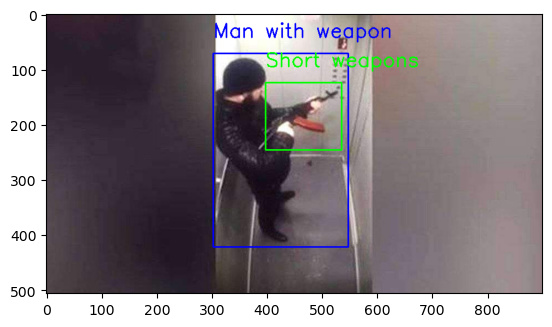


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/6.jpg: 1024x1024 (no detections), 481.8ms
Speed: 3.5ms preprocess, 481.8ms inference, 0.5ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict12
1 label saved to runs/detect/predict12/labels


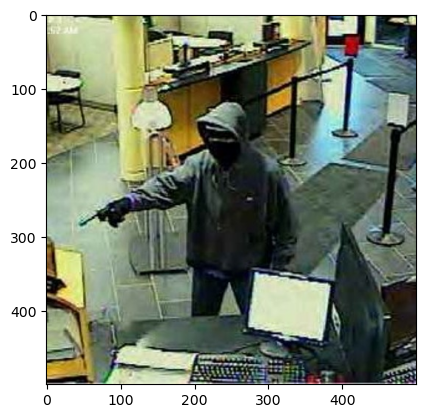


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/18.jpg: 1024x448 1 man_with_weapon, 192.6ms
Speed: 2.8ms preprocess, 192.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 448)
Results saved to runs/detect/predict12
2 labels saved to runs/detect/predict12/labels


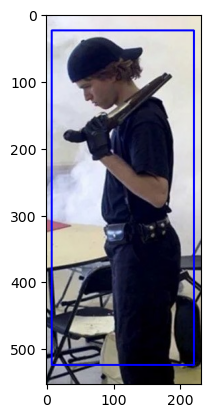


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/13.jpg: 544x1024 2 man_with_weapons, 2 short_weaponss, 239.8ms
Speed: 2.6ms preprocess, 239.8ms inference, 0.7ms postprocess per image at shape (1, 3, 544, 1024)
Results saved to runs/detect/predict12
3 labels saved to runs/detect/predict12/labels


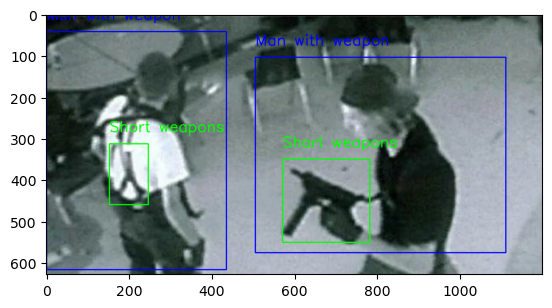


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/5.jpg: 704x1024 1 man_with_weapon, 320.9ms
Speed: 4.1ms preprocess, 320.9ms inference, 0.7ms postprocess per image at shape (1, 3, 704, 1024)
Results saved to runs/detect/predict12
4 labels saved to runs/detect/predict12/labels


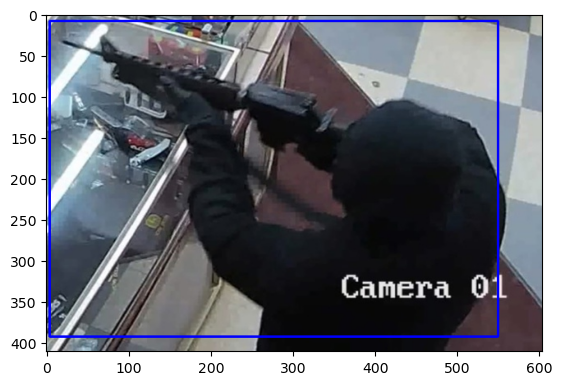


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/9.jpg: 512x1024 1 man_with_weapon, 1 short_weapons, 250.5ms
Speed: 2.4ms preprocess, 250.5ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 1024)
Results saved to runs/detect/predict12
5 labels saved to runs/detect/predict12/labels


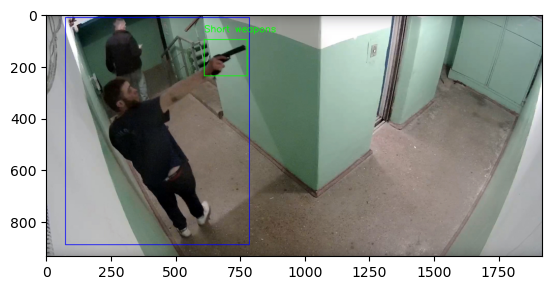


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/10.jpg: 704x1024 (no detections), 330.9ms
Speed: 3.1ms preprocess, 330.9ms inference, 0.5ms postprocess per image at shape (1, 3, 704, 1024)
Results saved to runs/detect/predict12
5 labels saved to runs/detect/predict12/labels


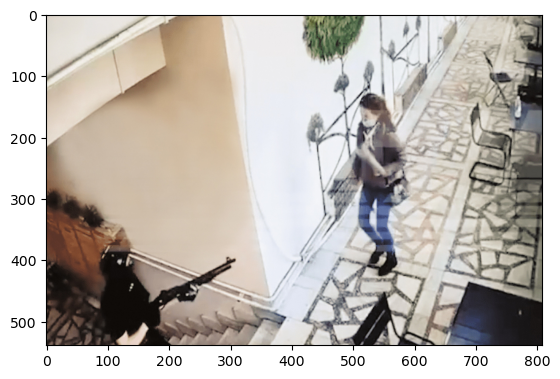


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/4.jpg: 576x1024 2 man_with_weapons, 298.6ms
Speed: 2.4ms preprocess, 298.6ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)
Results saved to runs/detect/predict12
6 labels saved to runs/detect/predict12/labels


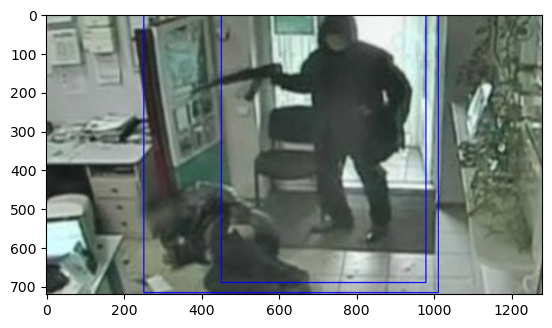


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/20.jpg: 704x1024 2 man_with_weapons, 1 long_weapons, 470.8ms
Speed: 3.1ms preprocess, 470.8ms inference, 0.9ms postprocess per image at shape (1, 3, 704, 1024)
Results saved to runs/detect/predict12
7 labels saved to runs/detect/predict12/labels


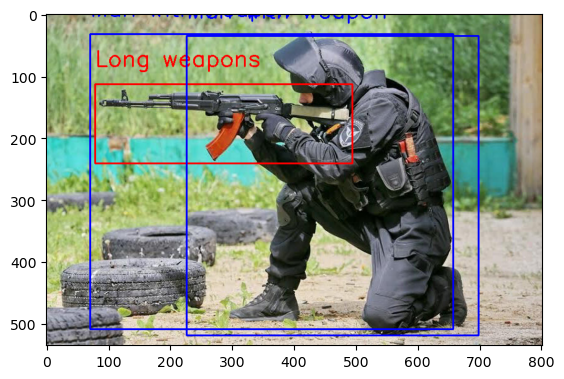


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/14.jpg: 1024x1024 1 man_with_weapon, 664.6ms
Speed: 4.9ms preprocess, 664.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict12
8 labels saved to runs/detect/predict12/labels


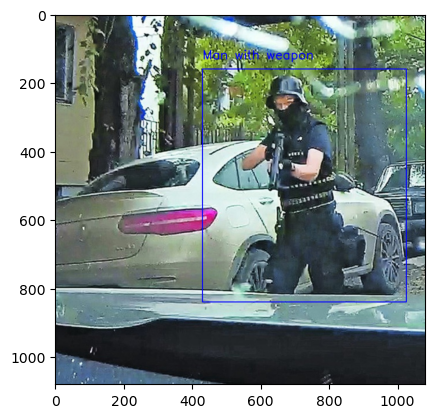


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/12.jpg: 576x1024 3 man_with_weapons, 391.8ms
Speed: 3.0ms preprocess, 391.8ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)
Results saved to runs/detect/predict12
9 labels saved to runs/detect/predict12/labels


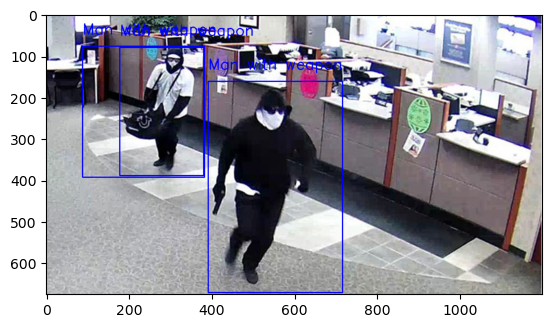


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/7.jpg: 576x1024 1 man_with_weapon, 301.4ms
Speed: 3.4ms preprocess, 301.4ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)
Results saved to runs/detect/predict12
10 labels saved to runs/detect/predict12/labels


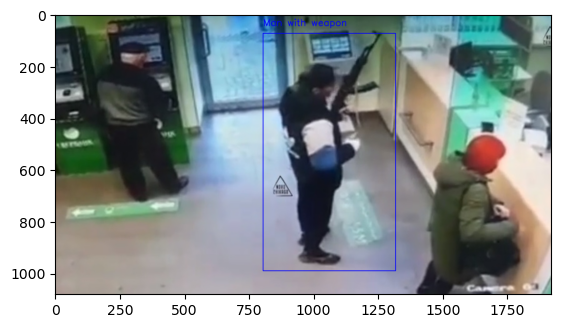


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/17.jpg: 1024x928 1 man_with_weapon, 540.9ms
Speed: 4.8ms preprocess, 540.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 928)
Results saved to runs/detect/predict12
11 labels saved to runs/detect/predict12/labels


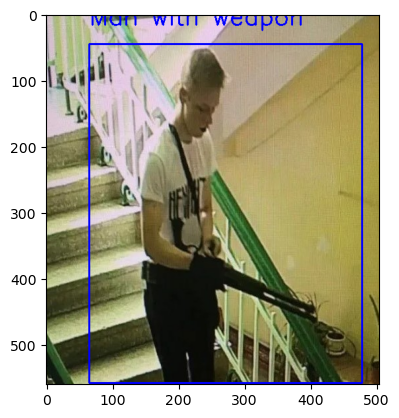


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/11.jpg: 576x1024 1 man_with_weapon, 392.9ms
Speed: 3.0ms preprocess, 392.9ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)
Results saved to runs/detect/predict12
12 labels saved to runs/detect/predict12/labels


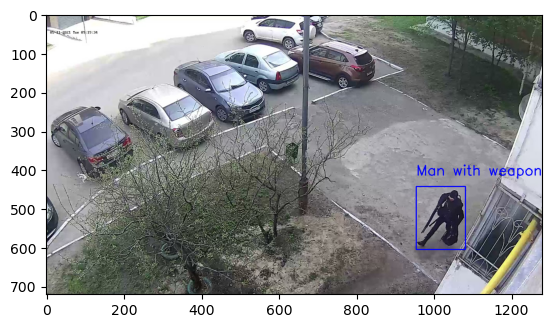


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/16.jpg: 576x1024 1 man_with_weapon, 2 short_weaponss, 386.6ms
Speed: 3.7ms preprocess, 386.6ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)
Results saved to runs/detect/predict12
13 labels saved to runs/detect/predict12/labels


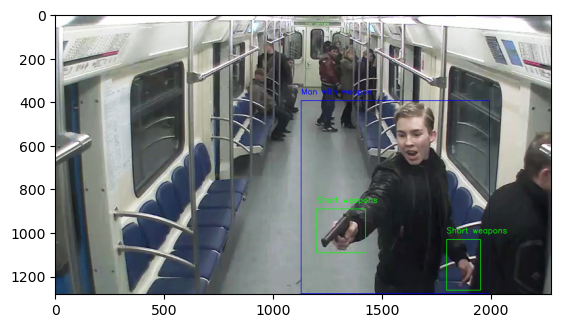


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/8.jpg: 1024x1024 1 man_with_weapon, 575.5ms
Speed: 5.5ms preprocess, 575.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict12
14 labels saved to runs/detect/predict12/labels


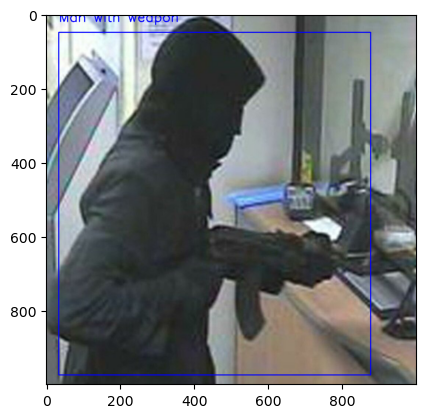


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/19.jpg: 1024x416 2 man_with_weapons, 1 long_weapons, 252.1ms
Speed: 1.9ms preprocess, 252.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 416)
Results saved to runs/detect/predict12
15 labels saved to runs/detect/predict12/labels


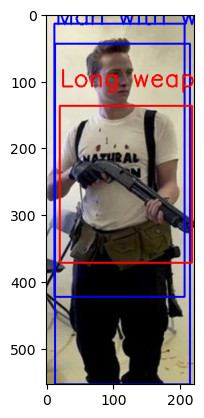


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/2.jpg: 576x1024 1 man_with_weapon, 2 short_weaponss, 393.0ms
Speed: 3.5ms preprocess, 393.0ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)
Results saved to runs/detect/predict12
16 labels saved to runs/detect/predict12/labels


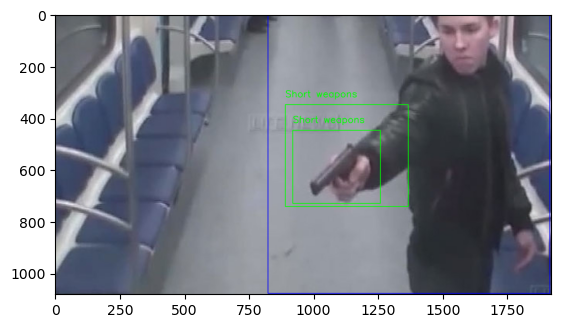


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/15.jpg: 704x1024 1 man_with_weapon, 2 long_weaponss, 436.8ms
Speed: 3.8ms preprocess, 436.8ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 1024)
Results saved to runs/detect/predict12
17 labels saved to runs/detect/predict12/labels


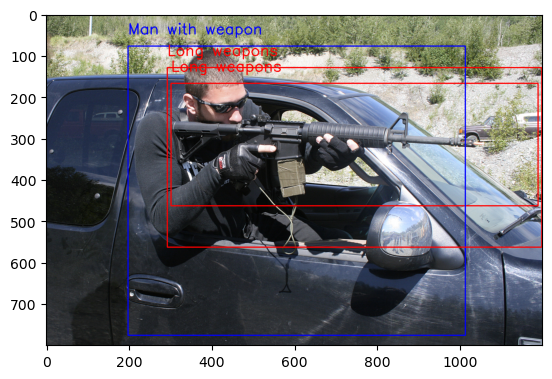


image 1/1 /home/isibgatullina/pfo/dataset/dataset/nerazm/1.jpg: 576x1024 1 man_with_weapon, 1 long_weapons, 346.8ms
Speed: 3.1ms preprocess, 346.8ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)
Results saved to runs/detect/predict12
18 labels saved to runs/detect/predict12/labels


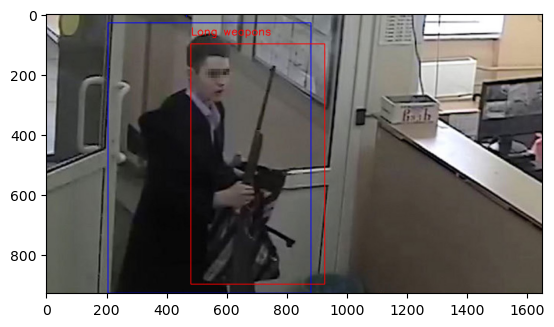

In [7]:
class_colors = {
    0: (255, 0, 0), 
    1: (0, 255, 0), 
    2: (0, 0, 255)
}

class_font = cv2.FONT_HERSHEY_SIMPLEX
class_font_scale = 1.2

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    
    results = model(file_path, save_txt=True, save_crop=True)  
 
    for result in results:                                         
        boxes = result.boxes.cpu().numpy()
        img = cv2.imread(file_path)

        for box in boxes:                                          
            r = box.xyxy[0].astype(int) 
            cls = box.cls[0].astype(int)
            if cls == 0:
                label = "Man with weapon"
            if cls == 1:
                label = "Short weapons"
            if cls == 2:
                label = "Long weapons"

            box_color = class_colors.get(cls, (255, 255, 255))
            
            (label_width, label_height), _ = cv2.getTextSize(label, class_font, class_font_scale, 1)
            
            text_position = (r[0], r[1] - 3 - label_height)

            cv2.rectangle(img, (r[0], r[1]), (r[2], r[3]), box_color, 2)
            cv2.putText(img, label, text_position, class_font, class_font_scale, box_color, 2)

        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()



In [3]:
 !yolo task=detect mode=predict model='best.pt' conf=0.55 source='video.webm' show=True

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.198 🚀 Python-3.10.11 torch-2.0.0 CPU (AMD EPYC 7713 64-Core Processor)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs

video 1/1 (1/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 303.2ms
video 1/1 (2/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 323.7ms
video 1/1 (3/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 262.6ms
video 1/1 (4/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 333.9ms
video 1/1 (5/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 364.3ms
video 1/1 (6/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 365.4ms
video 1/1 (7/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 366.4ms
video 1/1 (8/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 372.6ms
video 1/1 (9/734) /home/isibgatullina/pfo/video

video 1/1 (91/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 422.3ms
video 1/1 (92/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 382.0ms
video 1/1 (93/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 380.6ms
video 1/1 (94/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 388.1ms
video 1/1 (95/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 377.5ms
video 1/1 (96/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 379.7ms
video 1/1 (97/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 380.0ms
video 1/1 (98/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 384.6ms
video 1/1 (99/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 384.6ms
video 1/1 (100/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 379.3ms
video 1/1 (101/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 373.7ms
video 1/1 (102/734)

video 1/1 (183/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 401.9ms
video 1/1 (184/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 398.8ms
video 1/1 (185/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 404.0ms
video 1/1 (186/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 400.0ms
video 1/1 (187/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 410.2ms
video 1/1 (188/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 408.1ms
video 1/1 (189/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 411.1ms
video 1/1 (190/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 405.8ms
video 1/1 (191/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 397.5ms
video 1/1 (192/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 401.2ms
video 1/1 (193/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 406.6ms
video 1/1 

video 1/1 (275/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 403.6ms
video 1/1 (276/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 397.3ms
video 1/1 (277/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 413.0ms
video 1/1 (278/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 411.3ms
video 1/1 (279/734) /home/isibgatullina/pfo/video.webm: 1024x576 1 short_weapons, 396.6ms
video 1/1 (280/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 400.4ms
video 1/1 (281/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 397.3ms
video 1/1 (282/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 410.3ms
video 1/1 (283/734) /home/isibgatullina/pfo/video.webm: 1024x576 1 short_weapons, 402.1ms
video 1/1 (284/734) /home/isibgatullina/pfo/video.webm: 1024x576 1 short_weapons, 396.1ms
video 1/1 (285/734) /home/isibgatullina/pfo/video.webm: 1024x576 1 short_weapons, 408.8ms
video 1/1 

video 1/1 (366/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 399.8ms
video 1/1 (367/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 414.5ms
video 1/1 (368/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 403.3ms
video 1/1 (369/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 402.6ms
video 1/1 (370/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 402.0ms
video 1/1 (371/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 402.1ms
video 1/1 (372/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 410.7ms
video 1/1 (373/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 404.7ms
video 1/1 (374/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 405.5ms
video 1/1 (375/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 415.6ms
video 1/1 (376/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 407.7ms
video 1/1 

video 1/1 (458/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 400.4ms
video 1/1 (459/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 397.2ms
video 1/1 (460/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 405.3ms
video 1/1 (461/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 397.4ms
video 1/1 (462/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 402.5ms
video 1/1 (463/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 399.0ms
video 1/1 (464/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 398.5ms
video 1/1 (465/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 397.2ms
video 1/1 (466/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 410.5ms
video 1/1 (467/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 401.4ms
video 1/1 (468/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 406.6ms
video 1/1 

video 1/1 (550/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 404.9ms
video 1/1 (551/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 403.8ms
video 1/1 (552/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 399.2ms
video 1/1 (553/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 404.9ms
video 1/1 (554/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 402.2ms
video 1/1 (555/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 413.8ms
video 1/1 (556/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 410.7ms
video 1/1 (557/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 403.3ms
video 1/1 (558/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 407.0ms
video 1/1 (559/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 409.9ms
video 1/1 (560/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 414.4ms
video 1/1 

video 1/1 (642/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 404.6ms
video 1/1 (643/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 406.1ms
video 1/1 (644/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 404.1ms
video 1/1 (645/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 401.9ms
video 1/1 (646/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 412.5ms
video 1/1 (647/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 410.5ms
video 1/1 (648/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 406.6ms
video 1/1 (649/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 404.5ms
video 1/1 (650/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 399.7ms
video 1/1 (651/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 408.1ms
video 1/1 (652/734) /home/isibgatullina/pfo/video.webm: 1024x576 (no detections), 401.3ms
video 1/1 